In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import os
from glob import glob

In [13]:
train_dir = './dats/training/'
test_dir =  './dats/testing/'

In [14]:
leafCountUnique = glob(train_dir + '/*' )
numberOfClass = len(leafCountUnique)

In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (100, 100, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))
# summary of the model
model.summary()

# configure the model for training by adding metrics
model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 553, 599, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 553, 599, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 276, 299, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 274, 297, 32)      9248      
_________________________________________________________________
activation_11 (Activation)   (None, 274, 297, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 137, 148, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 135, 146, 64)     

In [27]:
epochs = 50  
batch_size = 25

In [28]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (100, 100),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= (100, 100),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1300 images belonging to 100 classes.
Found 300 images belonging to 100 classes.


In [29]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 800 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 400 // batch_size)

Epoch 1/50


KeyboardInterrupt: 

In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

KeyError: 'val_loss'

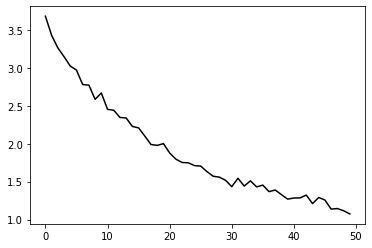

In [23]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

KeyError: 'val_accuracy'

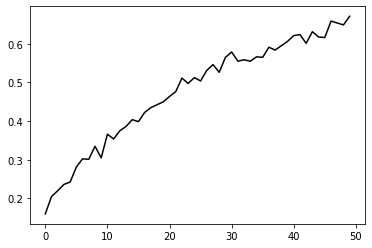

In [24]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [25]:
export_dir = './saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./saved_model/1\assets


In [2]:
import cv2
# Set the image path
img_path = '1.jpg'
# Read the image
image = cv2.imread(img_path)
print(image.shape)

(555, 601, 3)
